In [1]:
from datetime import datetime as dt
from math import log, log2 

In [21]:
def fun1(n):
    c0=0
    c=[c0]
    for i in range(1,n+1):
        cn=i+1+(1/i)*sum([c[j-1]+c[i-j] for j in range(1,i+1)])
        c.append(cn)
    return c[-1]
for i in range(11):
    print(fun1(i))

0
2.0
5.0
8.666666666666666
12.833333333333332
17.4
22.299999999999997
27.48571428571428
32.92142857142857
38.579365079365076
44.43730158730158


In [22]:
def fun2(n):
    c0=0
    for i in range(1,n+1):
        cn=((i+1)/i)*c0+2
        c0=cn
    return cn
print(fun2(10))

44.4373015873016


In [23]:
n=10**4

In [24]:
start = dt.now()
fun1(n)
a = dt.now() - start
print(a)

start = dt.now()
fun2(n)
a = dt.now() - start
print(a)

0:00:09.560477
0:00:00.000998


In [25]:
n=10**5

In [39]:
start = dt.now()
cn=2*(n+1)*(log(n+1)+0.57712-1)
a = dt.now() - start
print(cn)
print(a)

start = dt.now()
print(fun2(n))
a = dt.now() - start
print(a)

26785289.901190665
0:00:00.000323
26785482.231182374
0:00:00.169629


In [27]:
print(abs(fun2(n)-cn))

24.133209927007556


In [28]:
# QuickSort
global count
count=0
def quickSort(array):
    global count
    qs_sort(array,0,len(array)-1)


def qs_sort(array,a,b):
    global count
    if a>=b:
        return

    pivot=array[a+(b-a)//2]
    left=a
    right=b

    while True:
        while array[left]<pivot:
            count+=1
            left+=1
        while array[right]>pivot:
            count+=1
            right-=1

        count+=1
        if left>=right:
            break
        
        array[left],array[right]=array[right],array[left]
        left+=1
        right-=1
    
    qs_sort(array,a,right)
    qs_sort(array,right+1,b)

a=[56,32,2,9,0,3,5,87,53] 
quickSort(a)
print(a)

[0, 2, 3, 5, 9, 32, 53, 56, 87]


In [29]:
# MergeSort

def mergeSort(array):
    global count
    
    if len(array) <= 1:
        return

    m = len(array) // 2
    left = array[:m]
    right = array[m:]
    
    mergeSort(left)
    mergeSort(right)
    
    i = j = k = 0
    while i < len(left) and j < len(right):
        count+=1
        if left[i] < right[j]:
            array[k] = left[i]
            i += 1
        else:
            array[k] = right[j]
            j += 1
        k += 1

    while i < len(left):
        array[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        array[k] = right[j]
        j += 1
        k += 1

a=[56,32,2,9,0,3,5,87,53] 
mergeSort(a)
print(a)

[0, 2, 3, 5, 9, 32, 53, 56, 87]


In [30]:
# a)

from random import shuffle

def generate(n,N):
    array=[]
    arr=[i for i in range(n)]
    for _ in range(N):
        shuffle(arr)
        array.append(arr)
    return array


In [31]:
n=10**4
N=100

array4=generate(n,N)

start = dt.now()
for arr in array4:
    quickSort(arr)
time_q4=(dt.now() - start)/N
print(time_q4)

start = dt.now()
for arr in array4:
    mergeSort(arr)
time_m4=(dt.now() - start)/N
print(time_m4)

0:00:00.031378
0:00:00.057854


In [24]:
n=10**5
N=100


array5=generate(n,N)

start = dt.now()
for arr in array5:
    quickSort(arr)
time_q5=(dt.now() - start)/N
print(time_q5)

start = dt.now()
for arr in array5:
    mergeSort(arr)
time_m5=(dt.now() - start)/N
print(time_m5)

0:00:00.198448
0:00:00.365861


In [25]:
n=10**6 
N=10

array6=generate(n,N)

start = dt.now()
for arr in array6:
    quickSort(arr)
time_q6=(dt.now() - start)/N
print(time_q6)

start = dt.now()
for arr in array6:
    mergeSort(arr)
time_m6=(dt.now() - start)/N
print(time_m6)

0:00:02.428295
0:00:04.362670


In [36]:
#б
n=10**4
c_q = time_q4.total_seconds()/(n*log(n))
c_m = time_m4.total_seconds()/(n*log(n))
print(c_q,c_m)

3.406823063290059e-07 6.281418239007682e-07


In [37]:
n=10**6
time_q = c_q*n*log(n)
time_m = c_m*n*log(n)
print(time_q,time_m)

4.7067000000000005 8.678099999999999


In [32]:
#в
n=10**4
N=100

print(fun2(n))

def comparisons(n,N=100):
    global count
    array=generate(n,N)
    count_list=[]
    for arr in array:
        count=0
        quickSort(arr)
        count_list.append(count)
    return sum(count_list)/N, count_list
print(comparisons(n)[0])

175771.69593295958
133980.01


In [33]:
import matplotlib.pyplot as plt

x=[]
y=[]
c=[]
l=[i for i in range(10,300)]
for i in range(10,300):
    x.append(fun2(i))
    comp=comparisons(i)
    y.append(comp[0])
    c.append(comp[1])

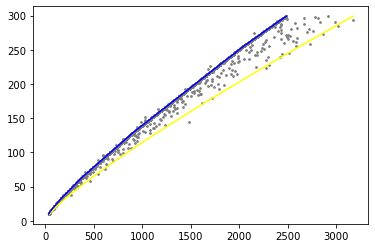

In [34]:
plt.plot(x,l, color = "yellow")
n0=10
for c0 in c:
    plt.scatter(c0,[n0]*len(c0),s=3, color = "grey")
    n0+=1
plt.plot(y,l, color = "blue")
plt.show()

In [13]:
from itertools import permutations

In [14]:
#г
n1 = 9
n2 = 10

def func(n,sortFunc):
    global count
    f_k={}
    
    pq = permutations([i for i in range(n)])
    for p in pq:
        count = 0
        sortFunc(list(p))
        if count in f_k:
            f_k[count]+= 1
        else:
            f_k[count] = 1

    plt.bar(list(f_k.keys()), f_k.values())
    plt.show()
    return f_k

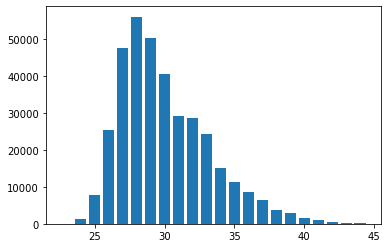

{29: 50290, 30: 40522, 28: 56066, 31: 29074, 34: 15124, 33: 24324, 32: 28708, 27: 47630, 35: 11208, 37: 6556, 40: 1464, 39: 2848, 38: 3712, 36: 8492, 26: 25384, 42: 576, 43: 256, 41: 960, 25: 7916, 44: 320, 24: 1376, 23: 74}


In [15]:
print(func(n1,quickSort))

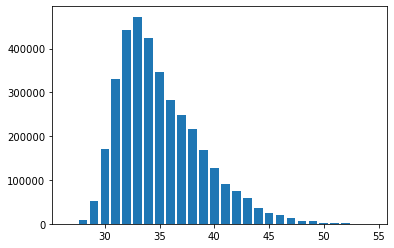

{34: 424238, 35: 345860, 33: 472917, 36: 281818, 32: 443454, 31: 330983, 37: 249008, 44: 36200, 41: 90948, 40: 126460, 43: 58296, 39: 169488, 42: 74160, 38: 216572, 45: 25360, 30: 170030, 47: 13752, 50: 2928, 49: 5696, 48: 7424, 46: 19736, 52: 1152, 53: 512, 51: 1920, 29: 51203, 54: 640, 28: 7628, 27: 417}


In [16]:
print(func(n2,quickSort))

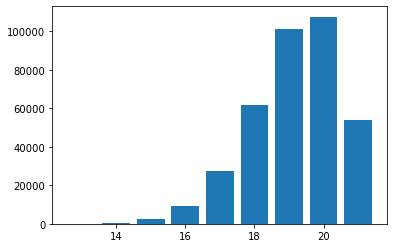

{13: 32, 14: 384, 15: 2304, 16: 9152, 17: 27168, 18: 61440, 19: 101120, 20: 107520, 21: 53760}


In [17]:
print(func(n1,mergeSort))

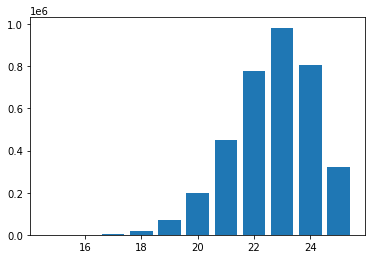

{15: 32, 16: 480, 17: 3648, 18: 18368, 19: 68448, 20: 197856, 21: 448448, 22: 779520, 23: 983040, 24: 806400, 25: 322560}


In [18]:
print(func(n2,mergeSort))